# Data Loading, Cleaning and Insights - Siddhant

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import math

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/MA4240/laptop_responses_final.csv")
data.head(15)

,timestamp,email,stream,brand,price_range,display,display_type,ram_size,cpu_clock_speed,cpu,cpu_model,graphic_card,storage_type,hdd_size,ssd_size,operating_sys,avg_watch_time
0,3/29/2022 17:15:21,ep18btech11011@iith.ac.in,UG,Lenovo,"Rs. 70,000 - Rs. 80,000",14 inch - 15 inch,Touch,8 GB,2 GHZ - 3 GHZ,Intel,Intel i7,None,HDD,500 GB,None,Windows,180
1,3/29/2022 17:15:29,ee21resch01003@iith.ac.in,PhD,HP,"Rs. 50,000 - Rs. 60,000",13 inch - 14 inch,Non-Touch,16 GB,2 GHZ - 3 GHZ,Intel,Intel i5,Intel Graphics,SSD,None,512 GB,Windows,212
2,3/29/2022 17:16:12,ai21mtech13006@iith.ac.in,PG,HP,"Rs. 40,000 - Rs. 50,000",14 inch - 15 inch,Non-Touch,4 GB,2 GHZ - 3 GHZ,Intel,Intel i3,None,HDD,500 GB,None,Windows,164
3,3/29/2022 17:16:50,ai20btech11022@iith.ac.in,UG,Apple,"Rs. 90,000 and above",13 inch - 14 inch,Non-Touch,8 GB,2 GHZ - 3 GHZ,Apple,M1,None,SSD,None,256 GB,MacOS,469
4,3/29/2022 17:18:23,ns20mtech11004@iith.ac.in,PG,Lenovo,"Rs. 60,000 - Rs. 70,000",14 inch - 15 inch,Non-Touch,8 GB,3 GHZ and above,AMD,AMD Ryzen 7,Nvidia Graphics,SSD,None,512 GB,Linux,413
5,3/29/2022 17:18:23,ch20btech11040@iith.ac.in,UG,Dell,"Rs. 70,000 - Rs. 80,000",14 inch - 15 inch,Non-Touch,8 GB,3 GHZ and above,Intel,Intel i5,Nvidia Graphics,SSD,None,512 GB,Windows,324
6,3/29/2022 17:19:02,ch18btech11005@iith.ac.in,UG,HP,"Rs. 50,000 - Rs. 60,000",14 inch - 15 inch,Non-Touch,8 GB,3 GHZ and above,Intel,Intel i7,Nvidia Graphics,HDD,1 TB,None,"Windows, Linux",841
7,3/29/2022 17:19:12,ch20resch11003@iith.ac.in,PhD,Lenovo,"Rs. 30,000 - Rs. 40,000",14 inch - 15 inch,Non-Touch,4 GB,1 GHZ - 2 GHZ,Intel,Intel i3,None,HDD,500 GB,None,Windows,647
8,3/29/2022 17:24:27,cs20resch11003@iith.ac.in,PhD,Dell,"Rs. 60,000 - Rs. 70,000",14 inch - 15 inch,Non-Touch,8 GB,2 GHZ - 3 GHZ,Intel,Intel i7,AMD Radeon Graphics,HDD,1 TB,None,"Windows, Linux",626
9,3/29/2022 17:24:53,me19btech11008@iith.ac.in,UG,HP,"Rs. 90,000 and above",15 inch - 16 inch,Touch,16 GB,3 GHZ and above,Intel,Intel i7,Intel Graphics,HDD,500 GB,None,Windows,683


In [ ]:
data.columns

Index(['timestamp', 'email', 'stream', 'brand', 'price_range', 'display',
       'display_type', 'ram_size', 'cpu_clock_speed', 'cpu', 'cpu_model',
       'graphic_card', 'storage_type', 'hdd_size', 'ssd_size', 'operating_sys',
       'avg_watch_time'],
      dtype='object')

In [ ]:
data[0:10]

,timestamp,email,stream,brand,price_range,display,display_type,ram_size,cpu_clock_speed,cpu,cpu_model,graphic_card,storage_type,hdd_size,ssd_size,operating_sys,avg_watch_time
0,3/29/2022 17:15:21,ep18btech11011@iith.ac.in,UG,Lenovo,"Rs. 70,000 - Rs. 80,000",14 inch - 15 inch,Touch,8 GB,2 GHZ - 3 GHZ,Intel,Intel i7,None,HDD,500 GB,None,Windows,180
1,3/29/2022 17:15:29,ee21resch01003@iith.ac.in,PhD,HP,"Rs. 50,000 - Rs. 60,000",13 inch - 14 inch,Non-Touch,16 GB,2 GHZ - 3 GHZ,Intel,Intel i5,Intel Graphics,SSD,None,512 GB,Windows,212
2,3/29/2022 17:16:12,ai21mtech13006@iith.ac.in,PG,HP,"Rs. 40,000 - Rs. 50,000",14 inch - 15 inch,Non-Touch,4 GB,2 GHZ - 3 GHZ,Intel,Intel i3,None,HDD,500 GB,None,Windows,164
3,3/29/2022 17:16:50,ai20btech11022@iith.ac.in,UG,Apple,"Rs. 90,000 and above",13 inch - 14 inch,Non-Touch,8 GB,2 GHZ - 3 GHZ,Apple,M1,None,SSD,None,256 GB,MacOS,469
4,3/29/2022 17:18:23,ns20mtech11004@iith.ac.in,PG,Lenovo,"Rs. 60,000 - Rs. 70,000",14 inch - 15 inch,Non-Touch,8 GB,3 GHZ and above,AMD,AMD Ryzen 7,Nvidia Graphics,SSD,None,512 GB,Linux,413
5,3/29/2022 17:18:23,ch20btech11040@iith.ac.in,UG,Dell,"Rs. 70,000 - Rs. 80,000",14 inch - 15 inch,Non-Touch,8 GB,3 GHZ and above,Intel,Intel i5,Nvidia Graphics,SSD,None,512 GB,Windows,324
6,3/29/2022 17:19:02,ch18btech11005@iith.ac.in,UG,HP,"Rs. 50,000 - Rs. 60,000",14 inch - 15 inch,Non-Touch,8 GB,3 GHZ and above,Intel,Intel i7,Nvidia Graphics,HDD,1 TB,None,"Windows, Linux",841
7,3/29/2022 17:19:12,ch20resch11003@iith.ac.in,PhD,Lenovo,"Rs. 30,000 - Rs. 40,000",14 inch - 15 inch,Non-Touch,4 GB,1 GHZ - 2 GHZ,Intel,Intel i3,None,HDD,500 GB,None,Windows,647
8,3/29/2022 17:24:27,cs20resch11003@iith.ac.in,PhD,Dell,"Rs. 60,000 - Rs. 70,000",14 inch - 15 inch,Non-Touch,8 GB,2 GHZ - 3 GHZ,Intel,Intel i7,AMD Radeon Graphics,HDD,1 TB,None,"Windows, Linux",626
9,3/29/2022 17:24:53,me19btech11008@iith.ac.in,UG,HP,"Rs. 90,000 and above",15 inch - 16 inch,Touch,16 GB,3 GHZ and above,Intel,Intel i7,Intel Graphics,HDD,500 GB,None,Windows,683


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        239 non-null    object
 1   email            239 non-null    object
 2   stream           239 non-null    object
 3   brand            239 non-null    object
 4   price_range      239 non-null    object
 5   display          239 non-null    object
 6   display_type     239 non-null    object
 7   ram_size         239 non-null    object
 8   cpu_clock_speed  239 non-null    object
 9   cpu              239 non-null    object
 10  cpu_model        239 non-null    object
 11  graphic_card     239 non-null    object
 12  storage_type     239 non-null    object
 13  hdd_size         239 non-null    object
 14  ssd_size         239 non-null    object
 15  operating_sys    239 non-null    object
 16  avg_watch_time   239 non-null    int64 
dtypes: int64(1), object(16)
memory usag

Haritha \
for each column,
analysing the type of data-numerical/categorical\
for categorical - calculate proportion/count and get mode\
for numerical - measures of central tendency,
                shape of the distribution,skewness , dispersion\
Visualise the data                




In [ ]:
data['department']=data['email'].str[:2]
data['year_join']=data['email'].str[2:4]


In [ ]:
data=data.drop(['email', 'timestamp'], axis=1)

In [ ]:
final_df = data.copy(deep=True)

In [ ]:
final_df = final_df.replace(to_replace="4 GB",value = 4)
final_df = final_df.replace(to_replace="8 GB",value = 8)
final_df = final_df.replace(to_replace="12 GB",value = 12)
final_df = final_df.replace(to_replace="16 GB",value = 16)
final_df = final_df.replace(to_replace="24 GB",value = 24)
final_df = final_df.replace(to_replace="32 GB",value = 32)
final_df = final_df.replace(to_replace="48 GB",value = 48)

In [ ]:
print(final_df['ram_size'].dtype)

int64


In [ ]:
final_df['year_join'] = final_df['year_join'].astype(int)

In [ ]:
print(final_df['year_join'].dtype)

int64


In [ ]:
final_df.head(10)

,stream,brand,price_range,display,display_type,ram_size,cpu_clock_speed,cpu,cpu_model,graphic_card,storage_type,hdd_size,ssd_size,operating_sys,avg_watch_time,department,year_join
0,UG,Lenovo,"Rs. 70,000 - Rs. 80,000",14 inch - 15 inch,Touch,8,2 GHZ - 3 GHZ,Intel,Intel i7,None,HDD,500 GB,None,Windows,180,ep,18
1,PhD,HP,"Rs. 50,000 - Rs. 60,000",13 inch - 14 inch,Non-Touch,16,2 GHZ - 3 GHZ,Intel,Intel i5,Intel Graphics,SSD,None,512 GB,Windows,212,ee,21
2,PG,HP,"Rs. 40,000 - Rs. 50,000",14 inch - 15 inch,Non-Touch,4,2 GHZ - 3 GHZ,Intel,Intel i3,None,HDD,500 GB,None,Windows,164,ai,21
3,UG,Apple,"Rs. 90,000 and above",13 inch - 14 inch,Non-Touch,8,2 GHZ - 3 GHZ,Apple,M1,None,SSD,None,256 GB,MacOS,469,ai,20
4,PG,Lenovo,"Rs. 60,000 - Rs. 70,000",14 inch - 15 inch,Non-Touch,8,3 GHZ and above,AMD,AMD Ryzen 7,Nvidia Graphics,SSD,None,512 GB,Linux,413,ns,20
5,UG,Dell,"Rs. 70,000 - Rs. 80,000",14 inch - 15 inch,Non-Touch,8,3 GHZ and above,Intel,Intel i5,Nvidia Graphics,SSD,None,512 GB,Windows,324,ch,20
6,UG,HP,"Rs. 50,000 - Rs. 60,000",14 inch - 15 inch,Non-Touch,8,3 GHZ and above,Intel,Intel i7,Nvidia Graphics,HDD,1 TB,None,"Windows, Linux",841,ch,18
7,PhD,Lenovo,"Rs. 30,000 - Rs. 40,000",14 inch - 15 inch,Non-Touch,4,1 GHZ - 2 GHZ,Intel,Intel i3,None,HDD,500 GB,None,Windows,647,ch,20
8,PhD,Dell,"Rs. 60,000 - Rs. 70,000",14 inch - 15 inch,Non-Touch,8,2 GHZ - 3 GHZ,Intel,Intel i7,AMD Radeon Graphics,HDD,1 TB,None,"Windows, Linux",626,cs,20
9,UG,HP,"Rs. 90,000 and above",15 inch - 16 inch,Touch,16,3 GHZ and above,Intel,Intel i7,Intel Graphics,HDD,500 GB,None,Windows,683,me,19


In [ ]:
data.head(5)

,stream,brand,price_range,display,display_type,ram_size,cpu_clock_speed,cpu,cpu_model,graphic_card,storage_type,hdd_size,ssd_size,operating_sys,avg_watch_time,department,year_join
0,UG,Lenovo,"Rs. 70,000 - Rs. 80,000",14 inch - 15 inch,Touch,8 GB,2 GHZ - 3 GHZ,Intel,Intel i7,None,HDD,500 GB,None,Windows,180,ep,18
1,PhD,HP,"Rs. 50,000 - Rs. 60,000",13 inch - 14 inch,Non-Touch,16 GB,2 GHZ - 3 GHZ,Intel,Intel i5,Intel Graphics,SSD,None,512 GB,Windows,212,ee,21
2,PG,HP,"Rs. 40,000 - Rs. 50,000",14 inch - 15 inch,Non-Touch,4 GB,2 GHZ - 3 GHZ,Intel,Intel i3,None,HDD,500 GB,None,Windows,164,ai,21
3,UG,Apple,"Rs. 90,000 and above",13 inch - 14 inch,Non-Touch,8 GB,2 GHZ - 3 GHZ,Apple,M1,None,SSD,None,256 GB,MacOS,469,ai,20
4,PG,Lenovo,"Rs. 60,000 - Rs. 70,000",14 inch - 15 inch,Non-Touch,8 GB,3 GHZ and above,AMD,AMD Ryzen 7,Nvidia Graphics,SSD,None,512 GB,Linux,413,ns,20


In [ ]:
Value_counts_of_columns = []
for column in data.columns:
    tmp_series = data[column].value_counts()
    tmp_series.name = column
    Value_counts_of_columns.append(tmp_series)

for i in Value_counts_of_columns :
  print(i,"\n")

UG     155
PG      56
PhD     28
Name: stream, dtype: int64 

HP        67
Dell      54
Lenovo    46
Asus      31
Acer      20
Apple     19
MSI        1
Xiaomi     1
Name: brand, dtype: int64 

Rs. 90,000 and above       53
Rs. 60,000 - Rs. 70,000    52
Rs. 50,000 - Rs. 60,000    40
Rs. 40,000 - Rs. 50,000    34
Rs. 70,000 - Rs. 80,000    28
Rs. 80,000 - Rs. 90,000    19
Rs. 30,000 - Rs. 40,000    13
Name: price_range, dtype: int64 

14 inch - 15 inch    100
15 inch - 16 inch     74
13 inch - 14 inch     45
12 inch - 13 inch     15
16 inch - 17 inch      5
Name: display, dtype: int64 

Non-Touch    213
Touch         26
Name: display_type, dtype: int64 

8 GB     135
16 GB     71
4 GB      15
32 GB     12
12 GB      3
24 GB      2
48 GB      1
Name: ram_size, dtype: int64 

2 GHZ - 3 GHZ      93
3 GHZ and above    68
Not sure           49
1 GHZ - 2 GHZ      29
Name: cpu_clock_speed, dtype: int64 

Intel    184
AMD       39
Apple     16
Name: cpu, dtype: int64 

Intel i5               10

In [ ]:
directory_type_of_data ={col_type :[] for col_type in ["regular categorigal","ordinal categorical","discrete numerical","continous numerical"]}
directory_type_of_data["regular categorigal"]=['stream','brand','display_type','cpu','cpu_model','graphic_card','storage_type','operating_sys','department'
                                                      ,'cpu_clock_speed','hdd_size','ssd_size']
directory_type_of_data["ordinal categorical"]=['price_range','display']
directory_type_of_data["discrete numerical"]=['ram_size','year_join']
directory_type_of_data["continous numerical"]=['avg_watch_time']

In [ ]:
for col_type in directory_type_of_data:
  print(col_type ,'-',directory_type_of_data[col_type])

regular categorigal - ['stream', 'brand', 'display_type', 'cpu', 'cpu_model', 'graphic_card', 'storage_type', 'operating_sys', 'department', 'cpu_clock_speed', 'hdd_size', 'ssd_size']
ordinal categorical - ['price_range', 'display']
discrete numerical - ['ram_size', 'year_join']
continous numerical - ['avg_watch_time']


In [ ]:
data.mode()

,stream,brand,price_range,display,display_type,ram_size,cpu_clock_speed,cpu,cpu_model,graphic_card,storage_type,hdd_size,ssd_size,operating_sys,avg_watch_time,department,year_join
0,UG,HP,"Rs. 90,000 and above",14 inch - 15 inch,Non-Touch,8 GB,2 GHZ - 3 GHZ,Intel,Intel i5,Nvidia Graphics,SSD,None,512 GB,Windows,451,cs,20
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,844,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,883,NaN,NaN


**Categorical**

Windows - 215
Linux - 72
MacOS - 22


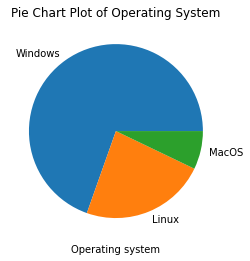

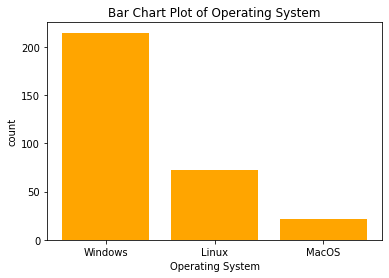

In [ ]:

y = pd.get_dummies(data.operating_sys)
y.Linux += y["Windows, Linux, MacOS"]
y.Windows += y["Windows, Linux, MacOS"]
y.MacOS += y["Windows, Linux, MacOS"]
y.Windows += y["Windows, Linux"]
y.Linux += y["Windows, Linux"]

y.drop(['Windows, Linux', 'Windows, Linux, MacOS'], axis = 1 ,inplace = True)


categors=['Windows','Linux','MacOS'] 
category_count = []
for i in categors:
        category_count.append(y[i].value_counts()[1])
        print(i,"-",y[i].value_counts()[1]) 
plt.figure()
plt.pie(list(category_count),labels=list(categors))
plt.xlabel('Operating system')
plt.title('Pie Chart Plot of Operating System')
plt.show() 
plt.figure()
plt.bar(list(categors) , list(category_count),color='orange')
plt.ylabel("count")
plt.xlabel('Operating System')
plt.title('Bar Chart Plot of Operating System')
plt.show()
                        

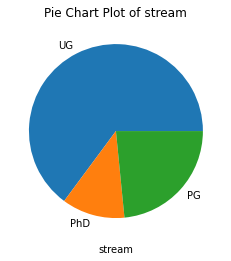

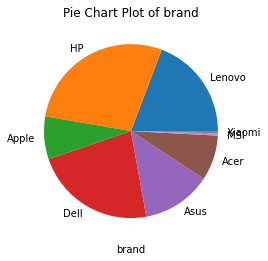

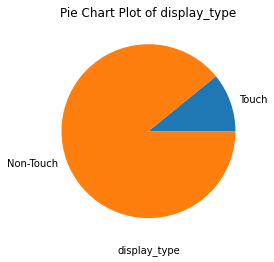

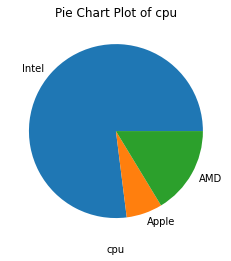

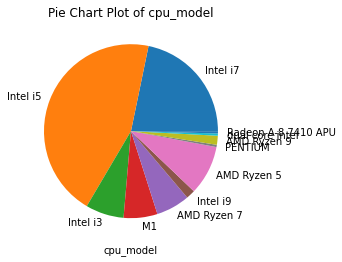

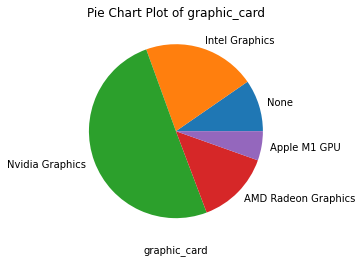

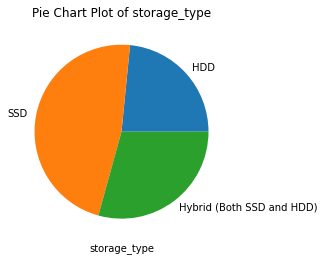

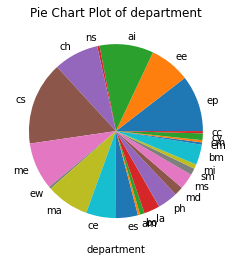

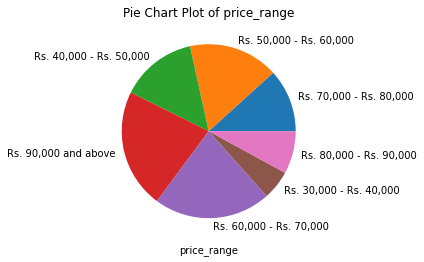

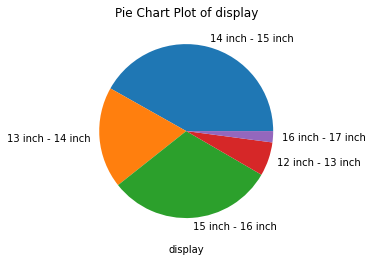

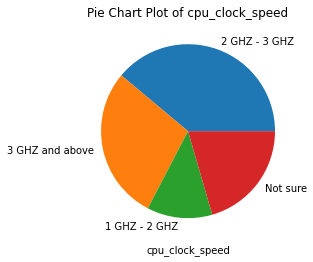

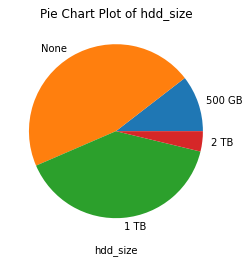

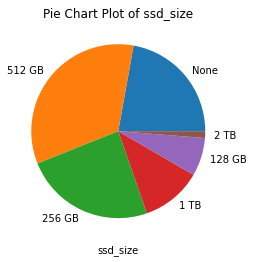

In [ ]:
columns1=['stream', 'brand', 'display_type', 'cpu', 'cpu_model', 'graphic_card', 'storage_type', 'department','price_range', 'display',
                     'cpu_clock_speed', 'hdd_size', 'ssd_size']

categors=[] 

for col in columns1:
    categors = data[col].unique()
    category_count = []
    for i in categors:
        category_count.append(data[col].value_counts()[i])
    plt.figure()
    plt.pie(list(category_count),labels=list(categors))
    plt.xlabel(col)
    plt.title('Pie Chart Plot of '+col)
    plt.show()                     


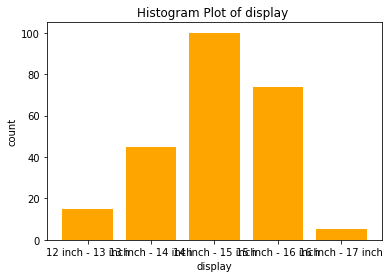

14 inch - 15 inch    100
15 inch - 16 inch     74
13 inch - 14 inch     45
12 inch - 13 inch     15
16 inch - 17 inch      5
Name: display, dtype: int64


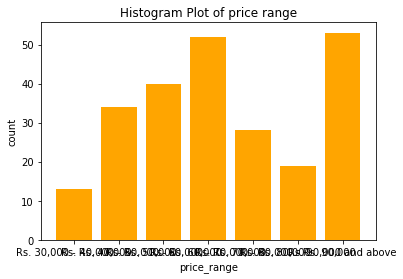

Rs. 90,000 and above       53
Rs. 60,000 - Rs. 70,000    52
Rs. 50,000 - Rs. 60,000    40
Rs. 40,000 - Rs. 50,000    34
Rs. 70,000 - Rs. 80,000    28
Rs. 80,000 - Rs. 90,000    19
Rs. 30,000 - Rs. 40,000    13
Name: price_range, dtype: int64


In [ ]:
column3=['price_range', 'display']

categors_collect_price_range=np.array([ 'Rs. 30,000 - Rs. 40,000','Rs. 40,000 - Rs. 50,000', 'Rs. 50,000 - Rs. 60,000','Rs. 60,000 - Rs. 70,000', 
                                                              'Rs. 70,000 - Rs. 80,000','Rs. 80,000 - Rs. 90,000', 'Rs. 90,000 and above'])
categors_collect_display = np.array(['12 inch - 13 inch', '13 inch - 14 inch', '14 inch - 15 inch', '15 inch - 16 inch', '16 inch - 17 inch'])

category_count = []
for i in categors_collect_display:
        category_count.append(data['display'].value_counts()[i])
plt.figure()
plt.bar(list(categors_collect_display) , list(category_count),color='orange')
plt.ylabel("count")
plt.xlabel("display")
plt.title('Histogram Plot of display ')
plt.show()
print(data['display'].value_counts())           

category_count = []
for i in categors_collect_price_range:
        category_count.append(data['price_range'].value_counts()[i])
plt.figure()
plt.bar(list(categors_collect_price_range) , list(category_count),color='orange')
plt.ylabel("count")
plt.xlabel("price_range")
plt.title('Histogram Plot of price range')
plt.show()
print(data['price_range'].value_counts())           


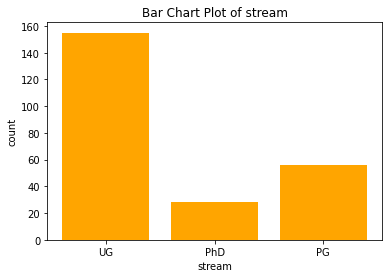

UG     155
PG      56
PhD     28
Name: stream, dtype: int64


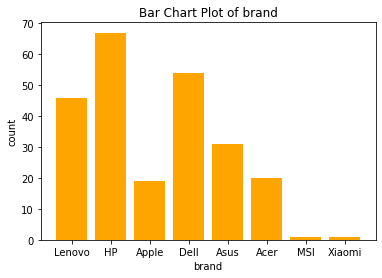

HP        67
Dell      54
Lenovo    46
Asus      31
Acer      20
Apple     19
MSI        1
Xiaomi     1
Name: brand, dtype: int64


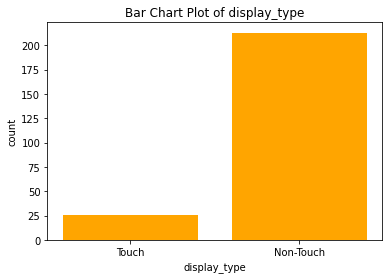

Non-Touch    213
Touch         26
Name: display_type, dtype: int64


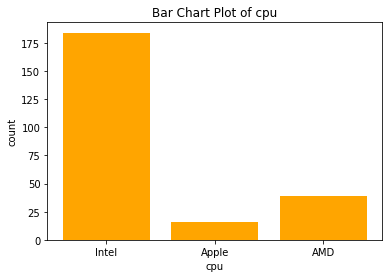

Intel    184
AMD       39
Apple     16
Name: cpu, dtype: int64


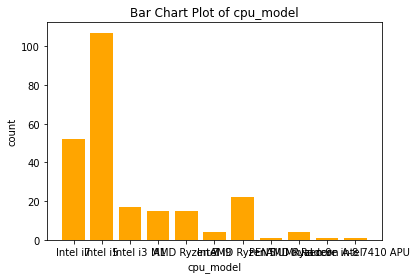

Intel i5               107
Intel i7                52
AMD Ryzen 5             22
Intel i3                17
M1                      15
AMD Ryzen 7             15
Intel i9                 4
AMD Ryzen 9              4
PENTIUM                  1
dual core intel          1
Radeon A-8 7410 APU      1
Name: cpu_model, dtype: int64


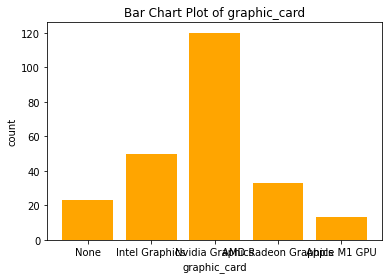

Nvidia Graphics        120
Intel Graphics          50
AMD Radeon Graphics     33
None                    23
Apple M1 GPU            13
Name: graphic_card, dtype: int64


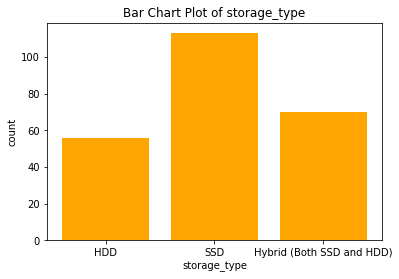

SSD                          113
Hybrid (Both SSD and HDD)     70
HDD                           56
Name: storage_type, dtype: int64


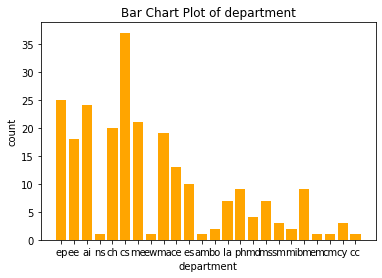

cs    37
ep    25
ai    24
me    21
ch    20
ma    19
ee    18
ce    13
es    10
bm     9
ph     9
la     7
ms     7
md     4
cy     3
sm     3
mi     2
bo     2
am     1
ew     1
em     1
cm     1
ns     1
cc     1
Name: department, dtype: int64


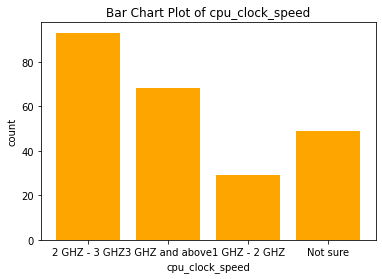

2 GHZ - 3 GHZ      93
3 GHZ and above    68
Not sure           49
1 GHZ - 2 GHZ      29
Name: cpu_clock_speed, dtype: int64


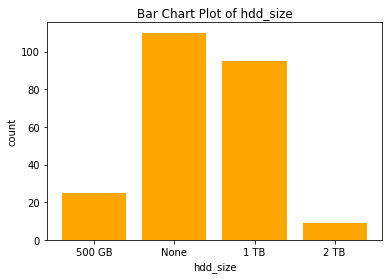

None      110
1 TB       95
500 GB     25
2 TB        9
Name: hdd_size, dtype: int64


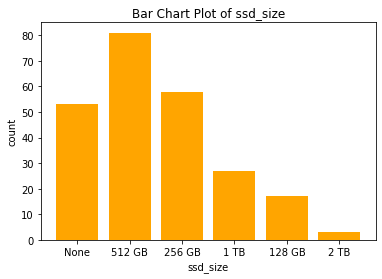

512 GB    81
256 GB    58
None      53
1 TB      27
128 GB    17
2 TB       3
Name: ssd_size, dtype: int64


In [ ]:
column2= ['stream','brand','display_type','cpu','cpu_model','graphic_card','storage_type','department','cpu_clock_speed','hdd_size','ssd_size']
categors=[] 

for col in column2:
    categors = data[col].unique()
    category_count = []
    for i in categors:
        category_count.append(data[col].value_counts()[i])
    plt.figure()
    plt.bar(list(categors) , list(category_count),color='orange')
    plt.ylabel("count")
    plt.xlabel(col)
    plt.title('Bar Chart Plot of '+col)
    plt.show()
    print(data[col].value_counts())                     


In [ ]:
#data.stream.value_counts()
data['stream'].unique()
#data['stream'].value_counts()['UG']


array(['UG', 'PhD', 'PG'], dtype=object)

In [ ]:
from scipy.stats import iqr

In [ ]:
final_df.avg_watch_time.mode()

0    451
1    844
2    883
dtype: int64


Modes of  avg_watch_time are [451, 844, 883]
mean of  avg_watch_time is 474.092050209205
median of  avg_watch_time is 467.0
Range of avg_watch_time = 867
0 th of  avg_watch_time quartile= 33.0
1 th of  avg_watch_time quartile= 251.5
2 th of  avg_watch_time quartile= 467.0
3 th of  avg_watch_time quartile= 679.0
4 th of  avg_watch_time quartile= 900.0
IQR of avg_watch_time = 427.5
Variance of avg_watch_time = 64306.15052257488
Standard deviation of avg_watch_time = 253.5865740187656


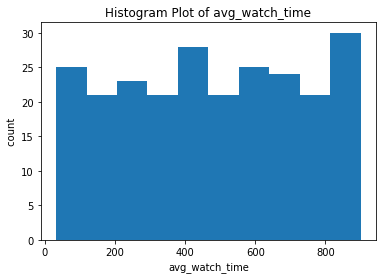

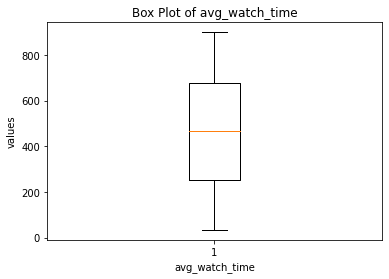


Modes of  ram_size are [8]
mean of  ram_size is 11.682008368200837
median of  ram_size is 8.0
Range of ram_size = 44
0 th of  ram_size quartile= 4.0
1 th of  ram_size quartile= 8.0
2 th of  ram_size quartile= 8.0
3 th of  ram_size quartile= 16.0
4 th of  ram_size quartile= 48.0
IQR of ram_size = 8.0
Variance of ram_size = 44.417709773988555
Standard deviation of ram_size = 6.664661264759714


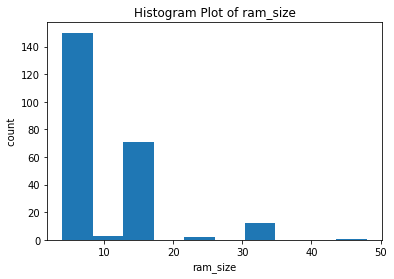

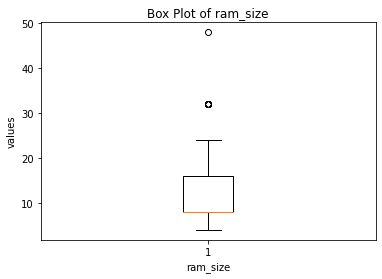


Modes of  year_join are [20]
mean of  year_join is 19.740585774058577
median of  year_join is 20.0
Range of year_join = 6
0 th of  year_join quartile= 16.0
1 th of  year_join quartile= 19.0
2 th of  year_join quartile= 20.0
3 th of  year_join quartile= 21.0
4 th of  year_join quartile= 22.0
IQR of year_join = 2.0
Variance of year_join = 1.5477670208854886
Standard deviation of year_join = 1.2440928505885276


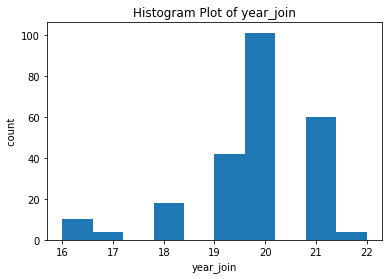

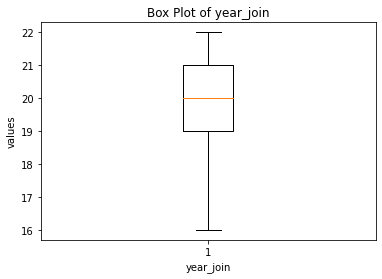

In [ ]:
columns5=['avg_watch_time','ram_size','year_join']
for col in columns5: 
    print("\nModes of ",col,"are",list(final_df[col].mode().values))
    y=np.array(final_df[col])
    print("mean of ",col ,"is", y.mean())
    print("median of ",col ,"is",np.median(y))
    Range =(max(y)-min(y))
    print("Range of",col,"=",Range)
    print("0 th of ",col,"quartile=",np.percentile(y,0))
    print("1 th of ",col,"quartile=",np.percentile(y,25))
    print("2 th of ",col,"quartile=",np.percentile(y,50))
    print("3 th of ",col,"quartile=",np.percentile(y,75))
    print("4 th of ",col,"quartile=",np.percentile(y,100))
    print("IQR of",col,"=",iqr(y) )
    print("Variance of",col,"=",np.var(y) )
    print("Standard deviation of",col,"=",np.std(y) )
    plt.figure()
    plt.ylabel(" count ")
    plt.xlabel(col)
    plt.title('Histogram Plot of '+col)
    plt.hist(y)
    plt.show()

    plt.figure()
    plt.ylabel("values")
    plt.xlabel(col)
    plt.title('Box Plot of '+col)
    plt.boxplot(y)
    plt.show()



# **Sampling Distribution**

# **Vijay and Sachin**

# **Final Function for Sampling Distribution Analysis of both Numerical Data and Categorical Data**

# **The Function takes arguments a (Dataframe, Sample Size, Number of Samples)**

# **It returns all the Sampling Distribution Plots with parameters like Mean,Variance, Standard Error for Numerical Data and Parameter like Mode for Categorical Data for the given sample size and number of samples**

In [ ]:
def func2(df,sample_size,n_samples):
  
  num_col = []
  categ_col = []
  for col in df.columns:
    if(df[col].dtype != 'int64'):
      categ_col.append(col)
    else:
      num_col.append(col)
  
  plt.rcParams.update({'font.size': 8})
  plt.rcParams["figure.figsize"] = (7,5)
  
  print("\n------------------------------------------------------------------------------------------------------------------------------------------")
  print("------------------------------------------------------------------------------------------------------------------------------------------")
  print("\n\nSampling Distributions of Numerical Data in given dataframe\n")
  
  # For Numerical Data
  num_df = df.drop(categ_col,axis=1)

  num_new_df = pd.DataFrame(columns=num_col)

  samp_mean_col_list = []
  samp_variance_col_list = []
  stand_error_col_list = []

  for j in range(n_samples):
    num_new_df = pd.DataFrame(columns=num_col)
    index = np.random.randint(0,len(num_df),sample_size)
    num_new_df = num_new_df.append(num_df.iloc[index],ignore_index=True)
    samp_mean_col = num_new_df.mean()
    samp_variance_col = num_new_df.var()
    stand_error_col = num_new_df.sem()
    samp_mean_col_list.append(samp_mean_col.to_numpy())
    samp_variance_col_list.append(samp_variance_col.to_numpy())
    stand_error_col_list.append(stand_error_col.to_numpy())
  
  samp_mean_col_list = np.array(samp_mean_col_list)
  samp_variance_col_list = np.array(samp_variance_col_list)
  stand_error_col_list = np.array(stand_error_col_list)

  total_sample_mean = np.mean(samp_mean_col_list,axis=0)
  var_of_sample_means = np.var(samp_mean_col_list,ddof=0,axis=0)
  total_sample_variance = np.mean(samp_variance_col_list,axis=0)
  total_sample_stand_error = np.mean(stand_error_col_list,axis=0)

  


  for i in range(len(num_col)):

    num_df[num_col[i]].plot.hist(bins=50)
    plt.title("Population Distribution for column {}".format(num_col[i]))
    plt.xlabel("{}".format(num_col[i]))
    plt.ylabel("Frequency")
    plt.show()

    print("\nExpectation of Sample Mean(Sample Size = {}) of {} for {} random combinations is {}".format(sample_size,num_col[i],n_samples,total_sample_mean[i]))
    print("Variance of Sample Mean(Sample Size = {}) of {} for {} random combinations is {}".format(sample_size,num_col[i],n_samples,var_of_sample_means[i]))
    print("Expectation of Sample Variance(Sample Size = {}) of {} for {} random combinations is {}".format(sample_size,num_col[i],n_samples,total_sample_variance[i]))
    print("Standard Error(Sample Size = {}) of {} for {} random combinations is {}\n".format(sample_size,num_col[i],n_samples,total_sample_stand_error[i]))
    
    x = max(samp_mean_col_list[:,i])-min(samp_mean_col_list[:,i])
    if(x < 100):
      x = 100
    plt.hist(samp_mean_col_list[:,i],bins=int(x/10))
    plt.title("Sampling Distribution(Sample Size = {}) of Mean of {} random samples for column {}".format(sample_size,n_samples,num_col[i]))
    plt.xlabel("{}".format(num_col[i]))
    plt.ylabel("Frequency")
    plt.show()
    
    """z = max(samp_variance_col_list[:,i])-min(samp_variance_col_list[:,i])
    if(z < 100):
      z = 100"""
    """plt.hist(samp_variance_col_list,bins=10)
    plt.title("Sampling Distribution(Sample Size = {}) of Variance of {} random samples for column {}".format(sample_size,n_samples,num_col[i]))
    plt.xlabel("{}".format(num_col[i]))
    plt.ylabel("Frequency")
    plt.show()"""
    
    """plt.hist(stand_error_col_list,bins=30)
    plt.title("Sampling Distribution(Sample Size = {}) of Standard Error of {} different samples for column {}".format(sample_size,n_samples,num_col[i]))
    plt.xlabel("{}".format(num_col[i]))
    plt.ylabel("Frequency")
    plt.show()"""

  print("\n------------------------------------------------------------------------------------------------------------------------------------------")
  print("------------------------------------------------------------------------------------------------------------------------------------------")
  print("\n\nSampling Distributions of Categorical Data in given dataframe\n\n")

  # For Categorical Sampling Distribution
  categ_df = df.drop(num_col,axis=1)
  new_df = pd.DataFrame(columns=categ_col)

  proportion_list = []

  for j in range(n_samples):
    index = np.random.randint(0,len(categ_df),sample_size)
    new_df = new_df.append(categ_df.iloc[index],ignore_index=True)
  new_col = new_df.columns
  modes_col = new_df.mode()
  for i in range(len(new_col)):
    if(i!=2 and i!= 3):
      y = new_df[new_col[i]].value_counts(sort=False)
    else:
      y = new_df[new_col[i]].value_counts(sort=True)
    print("Frequency of column {} of Sampling Distribution(Sample Size = {}) is \n{}\n".format(new_col[i],sample_size,y))
    proportion_list.append(y/new_df.shape[0])
    if(i != 2 and i != 7 and i != 8):
      y.plot.bar(rot=0)
    else:
      y.plot.bar()
    
    plt.title("Sampling Distribution of {} for sample size {}".format(new_col[i],sample_size))
    plt.ylabel("Frequency")
    plt.show()
    print("The Mode of the Column {} is {} and its sample proportion is {}\n".format(new_col[i],modes_col.iloc[0][i],y[modes_col.iloc[0][i]]/new_df.shape[0]))
  
  return proportion_list

In [ ]:
print(final_df.columns)

Index(['stream', 'brand', 'price_range', 'display', 'display_type', 'ram_size',
       'cpu_clock_speed', 'cpu', 'cpu_model', 'graphic_card', 'storage_type',
       'hdd_size', 'ssd_size', 'operating_sys', 'avg_watch_time', 'department',
       'year_join'],
      dtype='object')



------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------


Sampling Distributions of Numerical Data in given dataframe



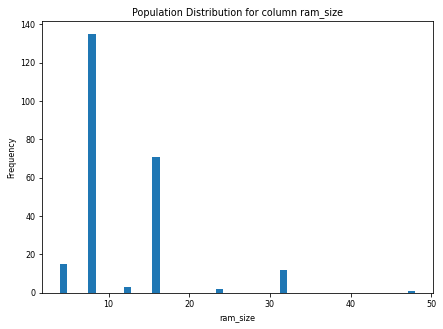


Expectation of Sample Mean(Sample Size = 10) of ram_size for 300 random combinations is 11.655999999999988
Variance of Sample Mean(Sample Size = 10) of ram_size for 300 random combinations is 4.475797333333338
Expectation of Sample Variance(Sample Size = 10) of ram_size for 300 random combinations is 43.594666666666654
Standard Error(Sample Size = 10) of ram_size for 300 random combinations is 1.918303152820605



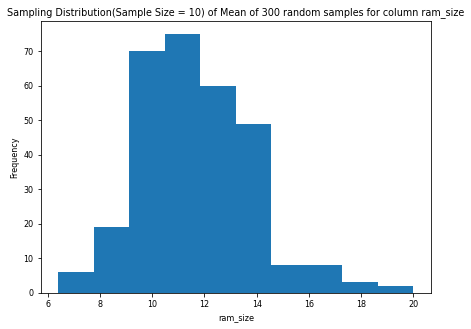

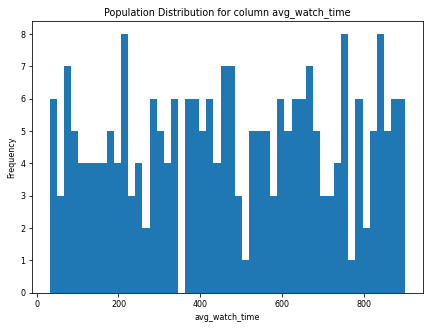


Expectation of Sample Mean(Sample Size = 10) of avg_watch_time for 300 random combinations is 471.6920000000001
Variance of Sample Mean(Sample Size = 10) of avg_watch_time for 300 random combinations is 7246.263869333334
Expectation of Sample Variance(Sample Size = 10) of avg_watch_time for 300 random combinations is 62889.290296296254
Standard Error(Sample Size = 10) of avg_watch_time for 300 random combinations is 78.21870951157547



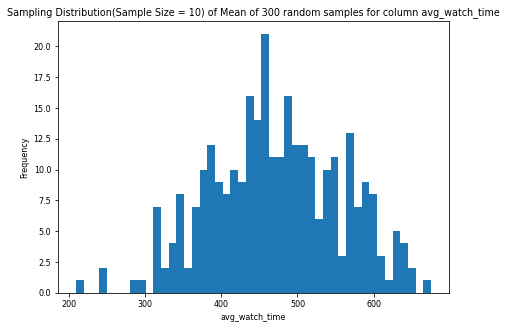

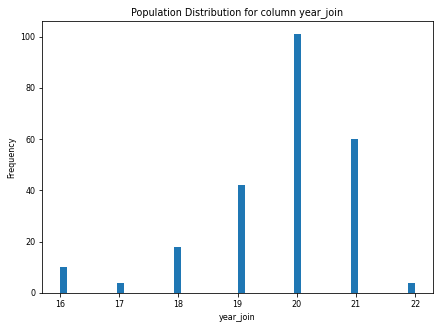


Expectation of Sample Mean(Sample Size = 10) of year_join for 300 random combinations is 19.675666666666665
Variance of Sample Mean(Sample Size = 10) of year_join for 300 random combinations is 0.1767078888888892
Expectation of Sample Variance(Sample Size = 10) of year_join for 300 random combinations is 1.6204814814814803
Standard Error(Sample Size = 10) of year_join for 300 random combinations is 0.3829575346126707



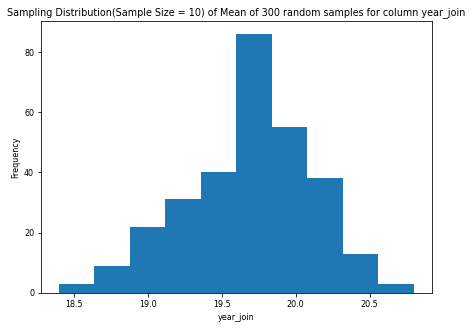


------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------


Sampling Distributions of Categorical Data in given dataframe


Frequency of column stream of Sampling Distribution(Sample Size = 10) is 
PhD     337
UG     1931
PG      732
Name: stream, dtype: int64



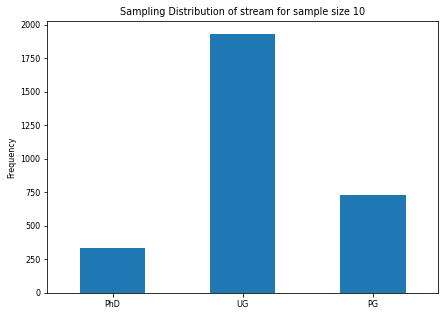

The Mode of the Column stream is UG and its sample proportion is 0.6436666666666667

Frequency of column brand of Sampling Distribution(Sample Size = 10) is 
Apple     247
Xiaomi     15
HP        834
Lenovo    565
Asus      349
Acer      284
Dell      697
MSI         9
Name: brand, dtype: int64



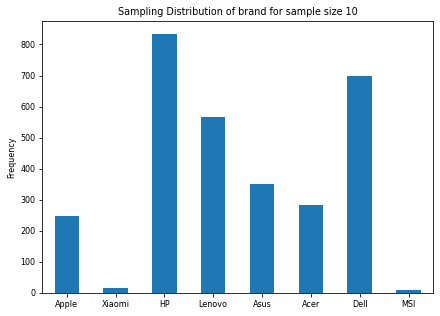

The Mode of the Column brand is HP and its sample proportion is 0.278

Frequency of column price_range of Sampling Distribution(Sample Size = 10) is 
Rs. 90,000 and above       683
Rs. 60,000 - Rs. 70,000    609
Rs. 50,000 - Rs. 60,000    531
Rs. 40,000 - Rs. 50,000    427
Rs. 70,000 - Rs. 80,000    365
Rs. 80,000 - Rs. 90,000    212
Rs. 30,000 - Rs. 40,000    173
Name: price_range, dtype: int64



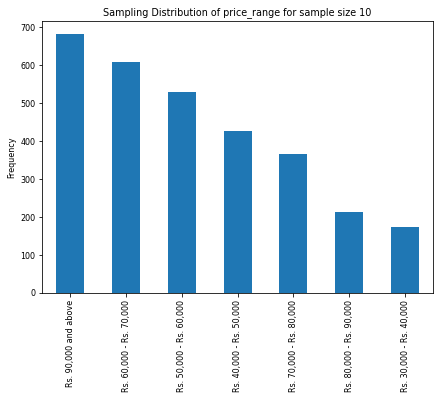

The Mode of the Column price_range is Rs. 90,000 and above and its sample proportion is 0.22766666666666666

Frequency of column display of Sampling Distribution(Sample Size = 10) is 
14 inch - 15 inch    1256
15 inch - 16 inch     950
13 inch - 14 inch     555
12 inch - 13 inch     181
16 inch - 17 inch      58
Name: display, dtype: int64



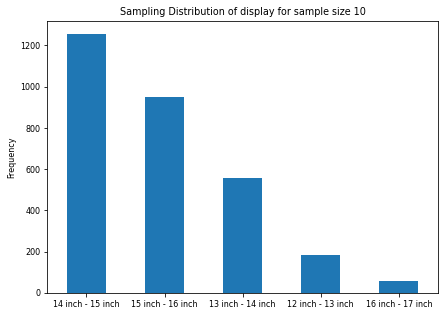

The Mode of the Column display is 14 inch - 15 inch and its sample proportion is 0.4186666666666667

Frequency of column display_type of Sampling Distribution(Sample Size = 10) is 
Non-Touch    2685
Touch         315
Name: display_type, dtype: int64



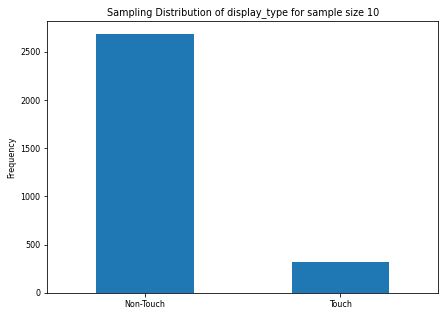

The Mode of the Column display_type is Non-Touch and its sample proportion is 0.895

Frequency of column cpu_clock_speed of Sampling Distribution(Sample Size = 10) is 
Not sure            656
3 GHZ and above     846
2 GHZ - 3 GHZ      1151
1 GHZ - 2 GHZ       347
Name: cpu_clock_speed, dtype: int64



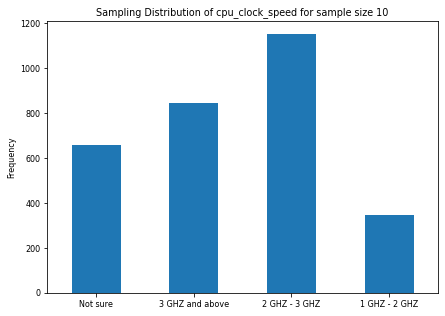

The Mode of the Column cpu_clock_speed is 2 GHZ - 3 GHZ and its sample proportion is 0.38366666666666666

Frequency of column cpu of Sampling Distribution(Sample Size = 10) is 
Apple     215
Intel    2321
AMD       464
Name: cpu, dtype: int64



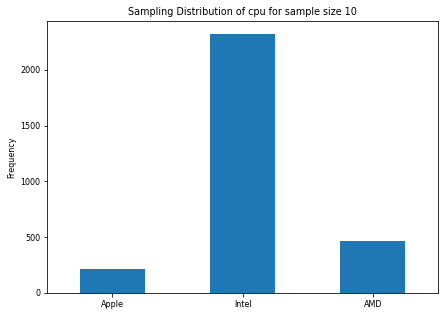

The Mode of the Column cpu is Intel and its sample proportion is 0.7736666666666666

Frequency of column cpu_model of Sampling Distribution(Sample Size = 10) is 
M1                      200
AMD Ryzen 9              46
Intel i5               1385
Intel i3                179
Intel i9                 50
Intel i7                658
AMD Ryzen 7             166
AMD Ryzen 5             276
Radeon A-8 7410 APU      12
PENTIUM                  19
dual core intel           9
Name: cpu_model, dtype: int64



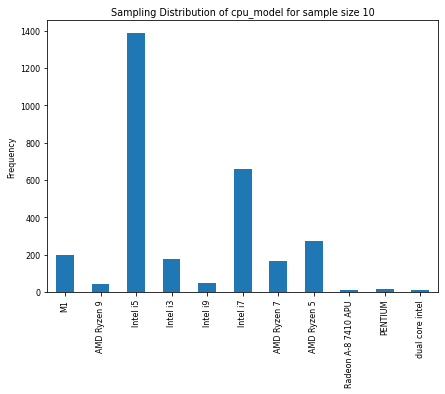

The Mode of the Column cpu_model is Intel i5 and its sample proportion is 0.46166666666666667

Frequency of column graphic_card of Sampling Distribution(Sample Size = 10) is 
Apple M1 GPU            173
None                    278
Intel Graphics          623
Nvidia Graphics        1522
AMD Radeon Graphics     404
Name: graphic_card, dtype: int64



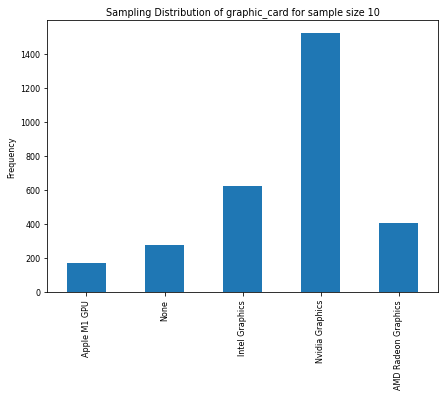

The Mode of the Column graphic_card is Nvidia Graphics and its sample proportion is 0.5073333333333333

Frequency of column storage_type of Sampling Distribution(Sample Size = 10) is 
SSD                          1422
Hybrid (Both SSD and HDD)     845
HDD                           733
Name: storage_type, dtype: int64



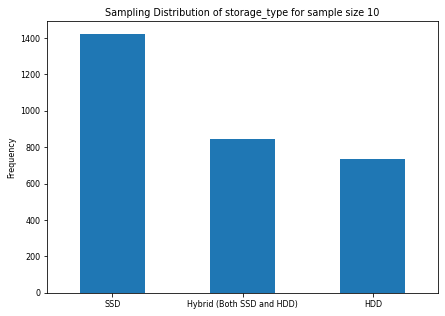

The Mode of the Column storage_type is SSD and its sample proportion is 0.474

Frequency of column hdd_size of Sampling Distribution(Sample Size = 10) is 
None      1401
1 TB      1195
500 GB     293
2 TB       111
Name: hdd_size, dtype: int64



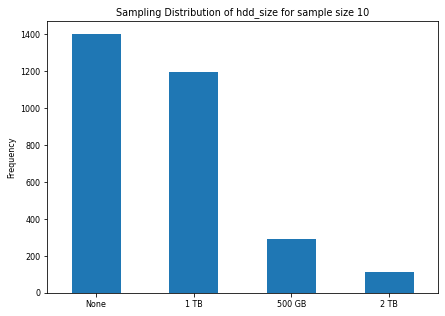

The Mode of the Column hdd_size is None and its sample proportion is 0.467

Frequency of column ssd_size of Sampling Distribution(Sample Size = 10) is 
512 GB    1016
1 TB       363
128 GB     213
256 GB     682
None       695
2 TB        31
Name: ssd_size, dtype: int64



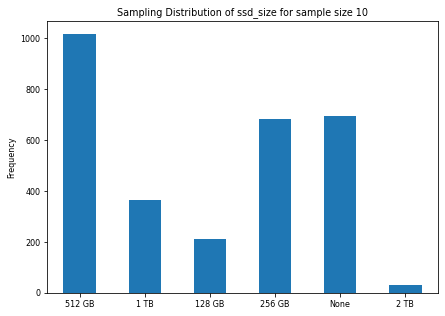

The Mode of the Column ssd_size is 512 GB and its sample proportion is 0.33866666666666667

Frequency of column operating_sys of Sampling Distribution(Sample Size = 10) is 
MacOS                     247
Windows, Linux, MacOS      32
Windows                  1836
Windows, Linux            823
Linux                      62
Name: operating_sys, dtype: int64



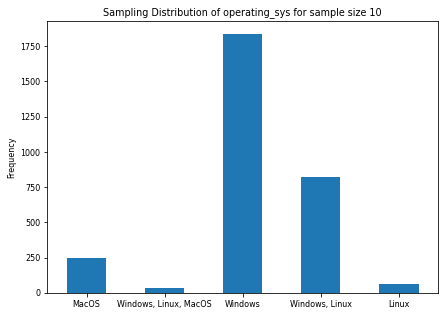

The Mode of the Column operating_sys is Windows and its sample proportion is 0.612

Frequency of column department of Sampling Distribution(Sample Size = 10) is 
bm    102
cs    467
ce    184
ee    209
ma    260
am     10
md     52
me    228
cm     12
ms     90
ep    312
la     73
ch    249
ai    331
es    114
em     10
sm     46
ew     14
cy     38
ph    118
mi     36
bo     23
ns     13
cc      9
Name: department, dtype: int64



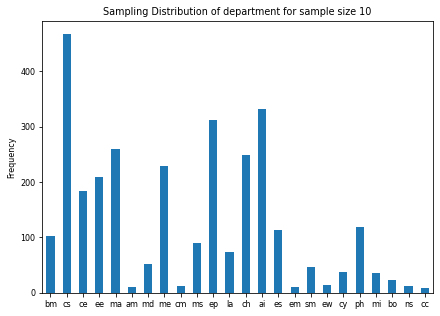

The Mode of the Column department is cs and its sample proportion is 0.15566666666666668



In [ ]:
prop_list1 = func2(final_df,10,300)


------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------


Sampling Distributions of Numerical Data in given dataframe



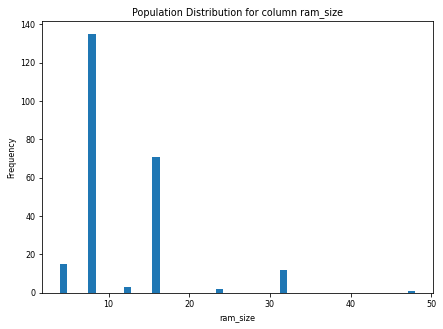


Expectation of Sample Mean(Sample Size = 20) of ram_size for 300 random combinations is 11.653333333333334
Variance of Sample Mean(Sample Size = 20) of ram_size for 300 random combinations is 2.2864888888888912
Expectation of Sample Variance(Sample Size = 20) of ram_size for 300 random combinations is 42.148771929824534
Standard Error(Sample Size = 20) of ram_size for 300 random combinations is 1.3899803653384364



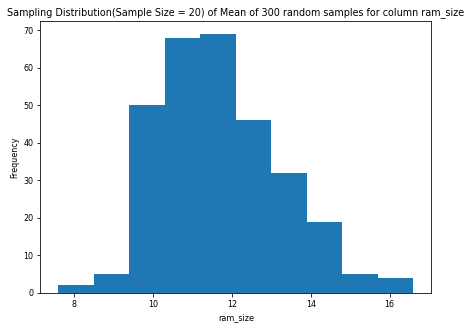

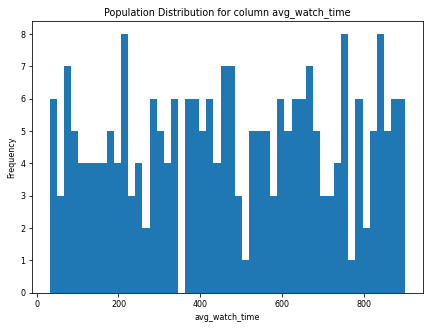


Expectation of Sample Mean(Sample Size = 20) of avg_watch_time for 300 random combinations is 475.9915000000004
Variance of Sample Mean(Sample Size = 20) of avg_watch_time for 300 random combinations is 3047.6988527500007
Expectation of Sample Variance(Sample Size = 20) of avg_watch_time for 300 random combinations is 64551.01078070176
Standard Error(Sample Size = 20) of avg_watch_time for 300 random combinations is 56.508762361645715



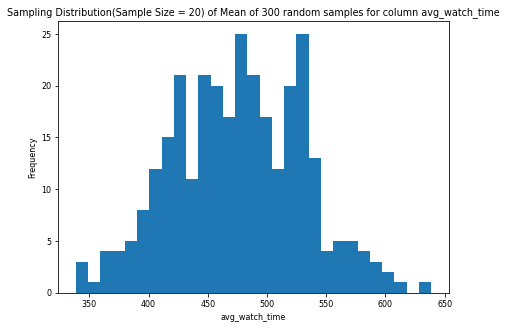

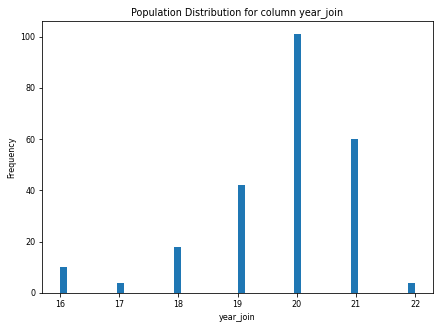


Expectation of Sample Mean(Sample Size = 20) of year_join for 300 random combinations is 19.743500000000004
Variance of Sample Mean(Sample Size = 20) of year_join for 300 random combinations is 0.08016608333333326
Expectation of Sample Variance(Sample Size = 20) of year_join for 300 random combinations is 1.5830263157894737
Standard Error(Sample Size = 20) of year_join for 300 random combinations is 0.2752468725377664



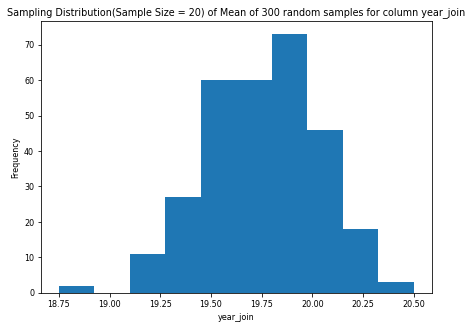


------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------


Sampling Distributions of Categorical Data in given dataframe


Frequency of column stream of Sampling Distribution(Sample Size = 20) is 
PG     1369
UG     3925
PhD     706
Name: stream, dtype: int64



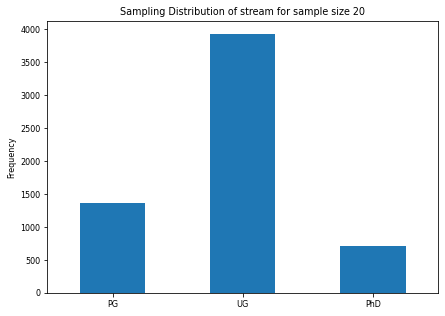

The Mode of the Column stream is UG and its sample proportion is 0.6541666666666667

Frequency of column brand of Sampling Distribution(Sample Size = 20) is 
Acer       510
Dell      1382
Lenovo    1143
HP        1693
Asus       764
Apple      446
Xiaomi      35
MSI         27
Name: brand, dtype: int64



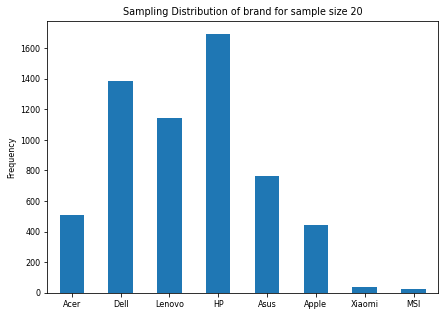

The Mode of the Column brand is HP and its sample proportion is 0.2821666666666667

Frequency of column price_range of Sampling Distribution(Sample Size = 20) is 
Rs. 60,000 - Rs. 70,000    1344
Rs. 90,000 and above       1277
Rs. 50,000 - Rs. 60,000    1001
Rs. 40,000 - Rs. 50,000     867
Rs. 70,000 - Rs. 80,000     702
Rs. 80,000 - Rs. 90,000     493
Rs. 30,000 - Rs. 40,000     316
Name: price_range, dtype: int64



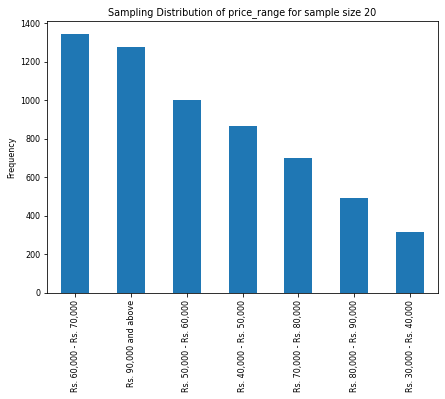

The Mode of the Column price_range is Rs. 60,000 - Rs. 70,000 and its sample proportion is 0.224

Frequency of column display of Sampling Distribution(Sample Size = 20) is 
14 inch - 15 inch    2506
15 inch - 16 inch    1933
13 inch - 14 inch    1095
12 inch - 13 inch     352
16 inch - 17 inch     114
Name: display, dtype: int64



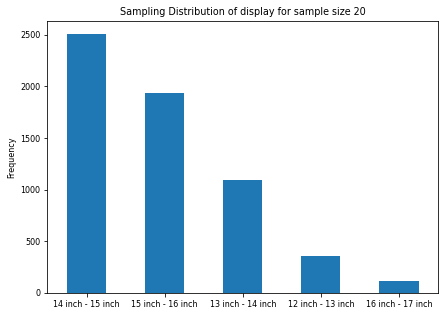

The Mode of the Column display is 14 inch - 15 inch and its sample proportion is 0.4176666666666667

Frequency of column display_type of Sampling Distribution(Sample Size = 20) is 
Non-Touch    5328
Touch         672
Name: display_type, dtype: int64



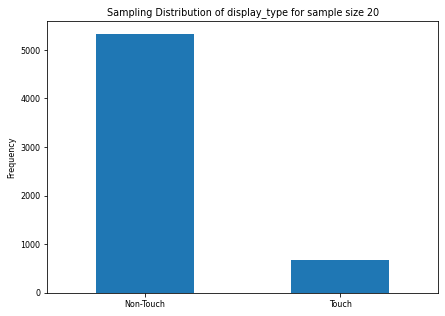

The Mode of the Column display_type is Non-Touch and its sample proportion is 0.888

Frequency of column cpu_clock_speed of Sampling Distribution(Sample Size = 20) is 
3 GHZ and above    1724
2 GHZ - 3 GHZ      2394
Not sure           1216
1 GHZ - 2 GHZ       666
Name: cpu_clock_speed, dtype: int64



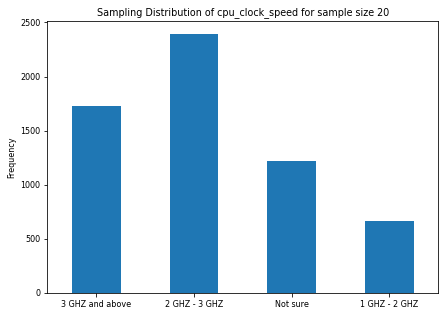

The Mode of the Column cpu_clock_speed is 2 GHZ - 3 GHZ and its sample proportion is 0.399

Frequency of column cpu of Sampling Distribution(Sample Size = 20) is 
Intel    4615
AMD      1006
Apple     379
Name: cpu, dtype: int64



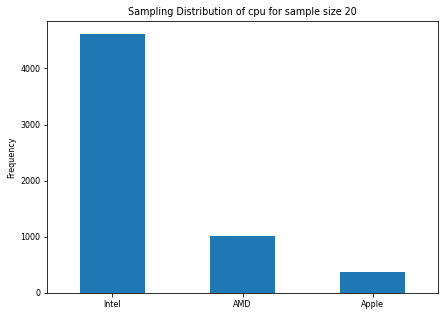

The Mode of the Column cpu is Intel and its sample proportion is 0.7691666666666667

Frequency of column cpu_model of Sampling Distribution(Sample Size = 20) is 
Intel i5               2662
Intel i7               1301
Radeon A-8 7410 APU      29
M1                      344
AMD Ryzen 7             383
AMD Ryzen 5             574
Intel i9                105
Intel i3                434
AMD Ryzen 9             118
dual core intel          25
PENTIUM                  25
Name: cpu_model, dtype: int64



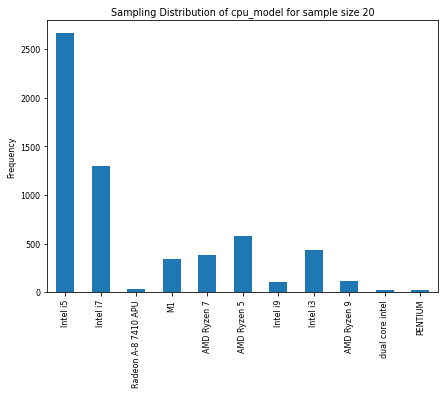

The Mode of the Column cpu_model is Intel i5 and its sample proportion is 0.44366666666666665

Frequency of column graphic_card of Sampling Distribution(Sample Size = 20) is 
Nvidia Graphics        3043
Intel Graphics         1202
AMD Radeon Graphics     860
None                    579
Apple M1 GPU            316
Name: graphic_card, dtype: int64



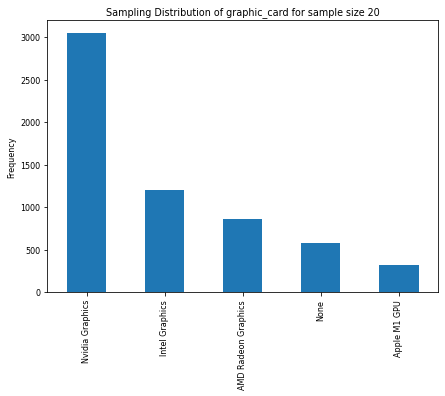

The Mode of the Column graphic_card is Nvidia Graphics and its sample proportion is 0.5071666666666667

Frequency of column storage_type of Sampling Distribution(Sample Size = 20) is 
SSD                          2791
Hybrid (Both SSD and HDD)    1740
HDD                          1469
Name: storage_type, dtype: int64



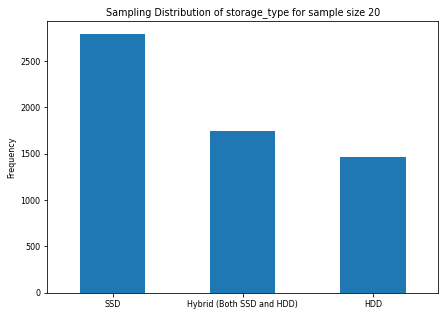

The Mode of the Column storage_type is SSD and its sample proportion is 0.4651666666666667

Frequency of column hdd_size of Sampling Distribution(Sample Size = 20) is 
None      2704
1 TB      2378
2 TB       266
500 GB     652
Name: hdd_size, dtype: int64



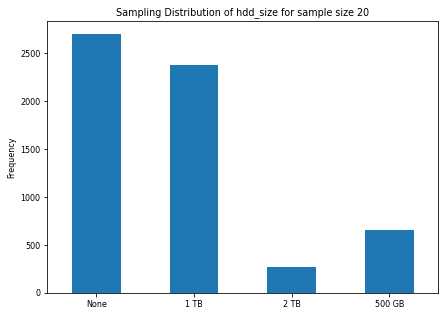

The Mode of the Column hdd_size is None and its sample proportion is 0.45066666666666666

Frequency of column ssd_size of Sampling Distribution(Sample Size = 20) is 
1 TB       692
256 GB    1435
128 GB     373
512 GB    2038
None      1387
2 TB        75
Name: ssd_size, dtype: int64



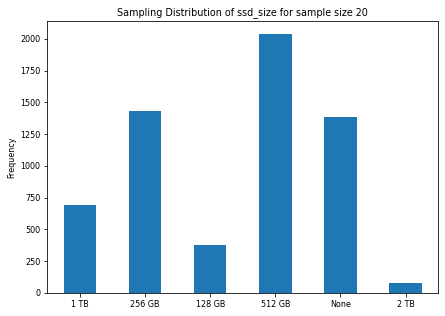

The Mode of the Column ssd_size is 512 GB and its sample proportion is 0.3396666666666667

Frequency of column operating_sys of Sampling Distribution(Sample Size = 20) is 
Windows, Linux           1568
Windows                  3800
MacOS                     446
Windows, Linux, MacOS      74
Linux                     112
Name: operating_sys, dtype: int64



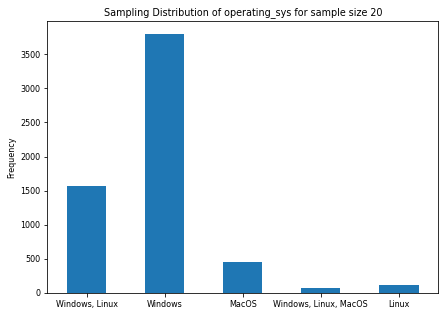

The Mode of the Column operating_sys is Windows and its sample proportion is 0.6333333333333333

Frequency of column department of Sampling Distribution(Sample Size = 20) is 
cs    909
ee    438
ph    242
ce    352
ep    686
ai    557
ma    451
me    516
ms    195
ch    545
es    233
cm     15
la    163
sm     83
bm    231
mi     34
md    101
ns     20
am     21
bo     52
cy     77
em     27
ew     24
cc     28
Name: department, dtype: int64



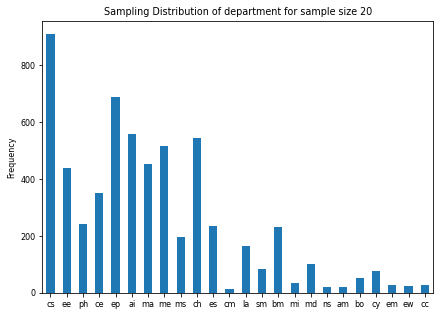

The Mode of the Column department is cs and its sample proportion is 0.1515



In [ ]:
prop_list2 = func2(final_df,20,300)

# **Comparing Proportions of Population Data and Sample Data**

In [ ]:
for i in range(len(final_df.columns)):
  modes_col = final_df.mode()
  print("The Proportions of the Column {} is \n{}".format(final_df.columns[i],final_df[final_df.columns[i]].value_counts()/len(final_df)))

The Proportions of the Column stream is 
UG     0.648536
PG     0.234310
PhD    0.117155
Name: stream, dtype: float64
The Proportions of the Column brand is 
HP        0.280335
Dell      0.225941
Lenovo    0.192469
Asus      0.129707
Acer      0.083682
Apple     0.079498
MSI       0.004184
Xiaomi    0.004184
Name: brand, dtype: float64
The Proportions of the Column price_range is 
Rs. 90,000 and above       0.221757
Rs. 60,000 - Rs. 70,000    0.217573
Rs. 50,000 - Rs. 60,000    0.167364
Rs. 40,000 - Rs. 50,000    0.142259
Rs. 70,000 - Rs. 80,000    0.117155
Rs. 80,000 - Rs. 90,000    0.079498
Rs. 30,000 - Rs. 40,000    0.054393
Name: price_range, dtype: float64
The Proportions of the Column display is 
14 inch - 15 inch    0.418410
15 inch - 16 inch    0.309623
13 inch - 14 inch    0.188285
12 inch - 13 inch    0.062762
16 inch - 17 inch    0.020921
Name: display, dtype: float64
The Proportions of the Column display_type is 
Non-Touch    0.891213
Touch        0.108787
Name: display_typ

In [ ]:
print(prop_list1)

[PhD    0.112333
UG     0.643667
PG     0.244000
Name: stream, dtype: float64, Apple     0.082333
Xiaomi    0.005000
HP        0.278000
Lenovo    0.188333
Asus      0.116333
Acer      0.094667
Dell      0.232333
MSI       0.003000
Name: brand, dtype: float64, Rs. 90,000 and above       0.227667
Rs. 60,000 - Rs. 70,000    0.203000
Rs. 50,000 - Rs. 60,000    0.177000
Rs. 40,000 - Rs. 50,000    0.142333
Rs. 70,000 - Rs. 80,000    0.121667
Rs. 80,000 - Rs. 90,000    0.070667
Rs. 30,000 - Rs. 40,000    0.057667
Name: price_range, dtype: float64, 14 inch - 15 inch    0.418667
15 inch - 16 inch    0.316667
13 inch - 14 inch    0.185000
12 inch - 13 inch    0.060333
16 inch - 17 inch    0.019333
Name: display, dtype: float64, Non-Touch    0.895
Touch        0.105
Name: display_type, dtype: float64, Not sure           0.218667
3 GHZ and above    0.282000
2 GHZ - 3 GHZ      0.383667
1 GHZ - 2 GHZ      0.115667
Name: cpu_clock_speed, dtype: float64, Apple    0.071667
Intel    0.773667
AMD      0.

# Point Estimation

### Average Watch *Time*

In [ ]:
sample_avg_time = np.random.choice(a= data['avg_watch_time'],size=100)
print ( sample_avg_time.mean() )
print (data['avg_watch_time'].mean() - sample_avg_time.mean())

445.89
28.202050209205026


### Ram **Size**

In [ ]:
sample_ram_size = np.random.choice(a= final_df['ram_size'],size=100)
sample_ram_size = sample_ram_size.astype('float')
print ( sample_ram_size.mean() )
print (final_df['ram_size'].mean() - sample_ram_size.mean())

11.76
-0.07799163179916313


### Joining Year

In [ ]:
sample_joining_year = np.random.choice(a= final_df['year_join'],size=100)
print ( sample_joining_year.mean() )
print (final_df['year_join'].mean() - sample_joining_year.mean())

19.61
0.1305857740585772


# Confidence Interval Margin of Error

### Average Watch *Time*

In [ ]:
sample_size = 100
sample = np.random.choice(a= final_df['avg_watch_time'], size = sample_size)
sample_mean = sample.mean()
z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*
print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = final_df['avg_watch_time'].std()  # Get the population standard deviation
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

print("Margin of Error:")
print(margin_of_error)

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Margin of Error:
49.80636183538905
Confidence interval:
(405.61363816461096, 505.22636183538907)


### Joining Year

In [ ]:
sample_size = 100
sample = np.random.choice(a= final_df['year_join'], size = sample_size)
sample_mean = sample.mean()
z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*
print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = final_df['year_join'].std()  # Get the population standard deviation
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

print("Margin of Error:")
print(margin_of_error)

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Margin of Error:
0.24434944520622548
Confidence interval:
(19.675650554793776, 20.164349445206227)


### Ram **Size**

In [ ]:
sample_size = 100
sample = np.random.choice(a= final_df['ram_size'], size = sample_size)
sample_mean = sample.mean()
z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*
print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = final_df['ram_size'].std()  # Get the population standard deviation
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

print("Margin of Error:")
print(margin_of_error)

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Margin of Error:
1.3089909501216725
Confidence interval:
(9.971009049878326, 12.588990950121673)
